In [7]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [10]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [48]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples:(i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [
            train_data[:i * num_val_samples],
            train_data[(i+1) * num_val_samples:]
        ], axis=0
    )
    
    partial_train_targets = np.concatenate(
        [
            train_targets[:i * num_val_samples],
            train_targets[(i+1) * num_val_samples:]
        ], axis=0
    )
    
    model = build_model()
    history = model.fit(
        partial_train_data, 
        partial_train_targets, 
        validation_data=(val_data, val_targets), 
        epochs=num_epochs, 
        batch_size=1, 
        verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [49]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

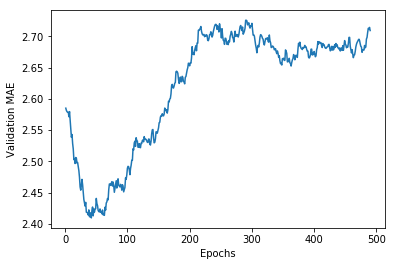

In [57]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [58]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
404/404 [==============================] - 1s 2ms/step - loss: 492.5746 - mean_absolute_error: 20.1985
Epoch 2/80
404/404 [==============================] - 0s 102us/step - loss: 305.7726 - mean_absolute_error: 15.3361
Epoch 3/80
404/404 [==============================] - 0s 91us/step - loss: 144.2585 - mean_absolute_error: 9.7977
Epoch 4/80
404/404 [==============================] - 0s 98us/step - loss: 64.5229 - mean_absolute_error: 6.1958
Epoch 5/80
404/404 [==============================] - 0s 77us/step - loss: 37.8949 - mean_absolute_error: 4.6002
Epoch 6/80
404/404 [==============================] - 0s 104us/step - loss: 26.9130 - mean_absolute_error: 3.7615
Epoch 7/80
404/404 [==============================] - 0s 103us/step - loss: 21.6370 - mean_absolute_error: 3.2591
Epoch 8/80
404/404 [==============================] - 0s 105us/step - loss: 19.1745 - mean_absolute_error: 3.1339
Epoch 9/80
404/404 [==============================] - 0s 80us/step - loss: 17.2372 - mea

404/404 [==============================] - 0s 73us/step - loss: 5.7136 - mean_absolute_error: 1.6979
Epoch 74/80
404/404 [==============================] - 0s 75us/step - loss: 5.8223 - mean_absolute_error: 1.7299
Epoch 75/80
404/404 [==============================] - 0s 94us/step - loss: 5.5566 - mean_absolute_error: 1.6843
Epoch 76/80
404/404 [==============================] - 0s 81us/step - loss: 5.6842 - mean_absolute_error: 1.7107
Epoch 77/80
404/404 [==============================] - 0s 77us/step - loss: 5.4553 - mean_absolute_error: 1.6544
Epoch 78/80
404/404 [==============================] - 0s 81us/step - loss: 5.5695 - mean_absolute_error: 1.6918
Epoch 79/80
404/404 [==============================] - 0s 77us/step - loss: 5.4097 - mean_absolute_error: 1.6627
Epoch 80/80
102/102 [==============================] - 0s 1ms/step


In [59]:
test_mae_score

3.031222895079968